In [1]:
import torch
import pandas as pd
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from astropy.io import fits
import pdb
from scipy.ndimage.filters import maximum_filter1d
import glob
import fitsio as fits
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.distributions import Bernoulli, Binomial, Normal, Uniform
from torch.nn.utils import clip_grad_norm_
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.distributions.normal import Normal
from tqdm import tqdm
import math

In [2]:
L = 1

In [3]:
T = 0.5

In [4]:
math.pi

3.141592653589793

In [5]:
x = torch.arange(0, L, 0.02)

In [6]:
x

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [7]:
y = torch.sin(2*math.pi*x/T)

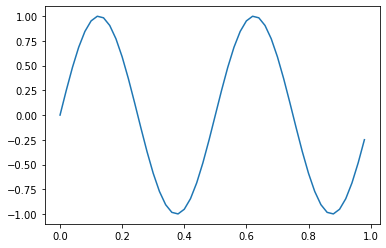

In [8]:
sns.lineplot(x=x.numpy(), y=y.numpy())

In [9]:
Ts = [L/2, L/4]

In [10]:
def make_sin():
#     T = Normal(loc=L/2, scale=L/4).sample()
    T = random.choice(Ts)
    y = 1*torch.sin(2*math.pi*x/T)
    p = Uniform(0.9, 0.99)
    measurements = Binomial(probs=p.sample()).sample(x.size())
    y_measure = y * measurements
    y_out = torch.stack((x, y_measure, y))
    return y_out

In [11]:
yy = make_sin()

In [12]:
yy.shape

torch.Size([3, 50])

In [13]:
# sns.lineplot(x=x.numpy(), y=make_sin().numpy())

In [14]:
# sns.scatterplot(x=x.numpy(), y=make_sin().numpy())

### Build dataset

In [15]:
def make_set(n=100):
    samples = []
    for _ in range(n):
        samples.append(make_sin())
    return samples

In [16]:
samples = make_set()

In [17]:
test=samples[30]

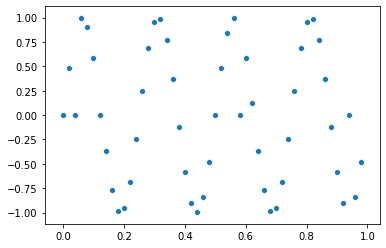

In [18]:
sns.scatterplot(x=test[0].numpy(), y=test[1].numpy())

### Output

In [19]:
outp = torch.stack(samples)

In [20]:
outp.shape

torch.Size([100, 3, 50])

In [21]:
train = outp[:90]
cv = outp[90:]

In [22]:
train.shape, cv.shape

(torch.Size([90, 3, 50]), torch.Size([10, 3, 50]))

In [23]:
from torch.utils.data import DataLoader
from utils import collate_ts, batchify
from loading import ToyDataset

In [24]:
train_set = ToyDataset(train)
cv_set = ToyDataset(cv)

In [25]:
train_loader = DataLoader(train_set, batch_size=10, collate_fn=collate_ts)
cv_loader = DataLoader(cv_set, batch_size=10, collate_fn=collate_ts)

In [26]:
torch.save(train_loader, 'toy_train.pt')
torch.save(cv_loader, 'toy_cv.pt')

### Checks

In [27]:
l = torch.load('toy_train.pt')

In [28]:
d = next(iter(l))

In [29]:
d['observed_data'][0].shape

torch.Size([50, 1])

In [30]:
d['observed_tp']

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])